# Final Project
## Machine Learning: Prediction on bike sharing demand

In [1]:
# Import

import folium
from folium.plugins import MarkerCluster

# data set
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from tensorflow.keras import layers

### Importing the merged dataset

In [2]:
#dataset = pd.read_csv('Joint_dataframe.csv')

dataset = pd.read_csv(
    'Joint_dataframe.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)
# exclude timestamp column
#dataset = dataset.loc[:, dataset.columns!='timestamp']

In [3]:
dataset

,index,In,Out,Station Id,Total,is_holiday,is_weekend,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,start_lon,start_lat,longitude,latitude
timestamp,,,,,,,,,,,,,,,,
2016-04-01,0,17,22,1,-5.0,0.0,0.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.109971,51.5292,-0.109971,51.5292
2016-04-01,1,42,31,2,11.0,0.0,0.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.197574,51.4996,-0.197574,51.4996
2016-04-01,2,51,39,3,12.0,0.0,0.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.084606,51.5213,-0.084606,51.5213
2016-04-01,3,44,37,4,7.0,0.0,0.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.120974,51.5301,-0.120974,51.5301
2016-04-01,4,48,38,5,10.0,0.0,0.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.156876,51.4931,-0.156876,51.4931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-08,22758,1,0,0,0.0,0.0,24.0,19.250000,19.229167,57.145833,15.562500,8.0,0.000000,0.0000,0.000000,0.0000
2016-05-08,22759,1,0,0,0.0,0.0,24.0,19.250000,19.229167,57.145833,15.562500,8.0,0.000000,0.0000,0.000000,0.0000
2016-05-09,22760,1,0,0,0.0,0.0,0.0,17.708333,17.645833,65.729167,16.145833,9.0,0.000000,0.0000,0.000000,0.0000


KeyboardInterrupt: 

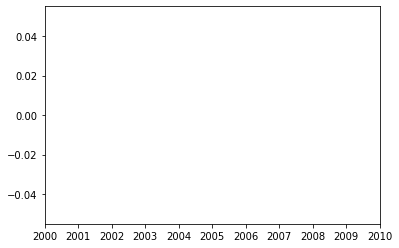

In [4]:
# Finding Outliers 

ax = sns.lineplot(x = "timestamp", y = "Total", data = dataset)
ax.set(xlabel = 'timestamp', ylabel = 'Count')

KeyboardInterrupt: 

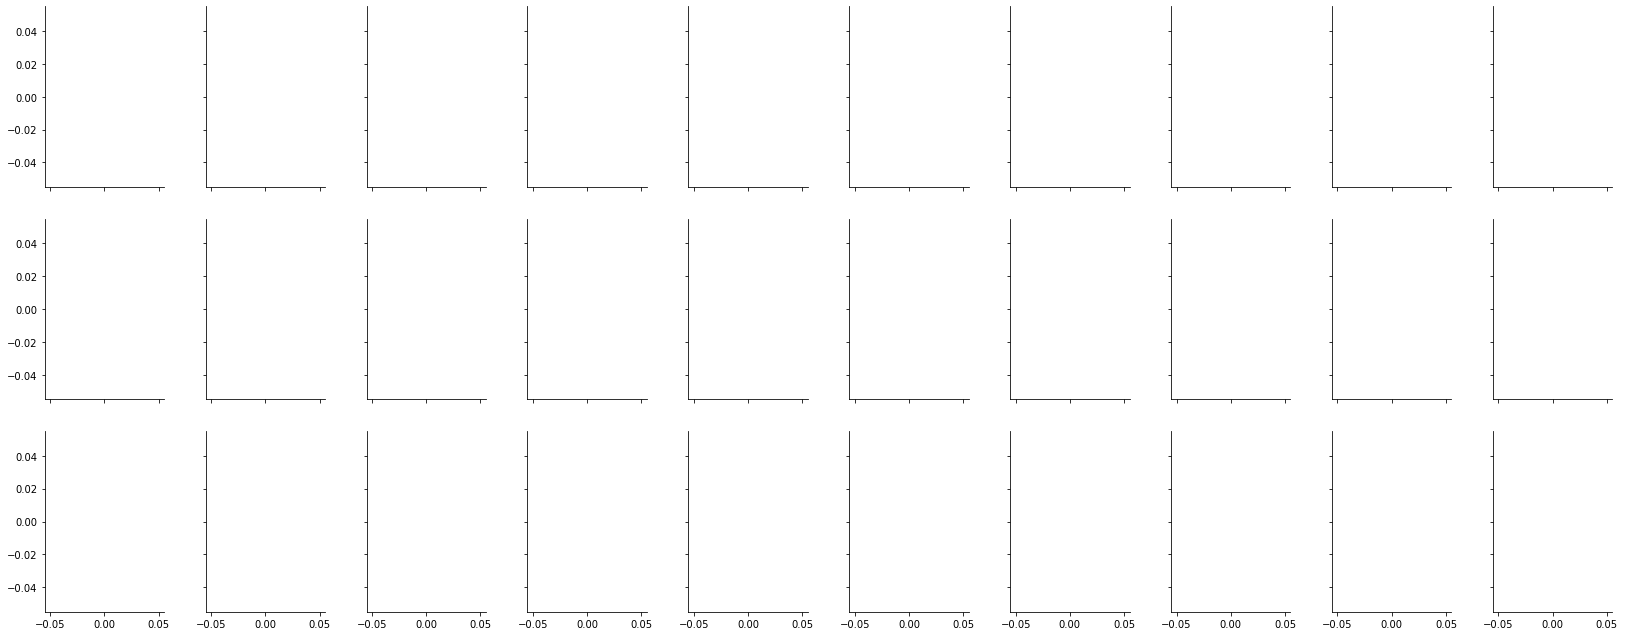

In [32]:
sns.relplot(x = "Station Id", y = "In", hue = "is_weekend",
            col = "date", col_wrap = 10,
            height = 3, aspect = .75, linewidth = 2.5,
            kind = "line", data = dataset);

## LSTM (Long short-term memory neural networks)

In [5]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset.iloc[0:train_size], dataset.iloc[train_size:len(dataset)]
print(len(train),len(test))

18210 4553


#### caling continuous data optimizes machine learning model performance. I scaled temperature, humidity and windspeed to have mean 0 and standard deviation 1. This process optimizes machine learning model's performance and model converges quicker.

In [5]:
from sklearn.preprocessing import StandardScaler
feature_transformer = StandardScaler()
feature_columns = ['avg_temp', 'avg_temp_feel', 'avg_humidity', 'avg_windSpeed']
feature_transformer = feature_transformer.fit(train[feature_columns].to_numpy())
train.loc[:, feature_columns] = feature_transformer.transform(train[feature_columns].to_numpy())
test.loc[:, feature_columns] = feature_transformer.transform(test[feature_columns].to_numpy())

Total_transformer = StandardScaler()
Total_transformer = Total_transformer.fit(train[['In']])
train['In'] = Total_transformer.transform(train[['In']])
test['In'] = Total_transformer.transform(test[['In']])

/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_28481/4077722669.py:10: SettingWithCopyWarning: 
A va

In [6]:
train.head()

,index,In,Out,Station Id,Total,is_holiday,is_weekend,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,start_lon,start_lat,longitude,latitude
timestamp,,,,,,,,,,,,,,,,
2016-04-01,0,-0.511167,22,1,-5.0,0.0,0.0,-0.756714,-0.261923,-0.320382,-0.817092,1.0,-0.109971,51.5292,-0.109971,51.5292
2016-04-01,1,0.237227,31,2,11.0,0.0,0.0,-0.756714,-0.261923,-0.320382,-0.817092,1.0,-0.197574,51.4996,-0.197574,51.4996
2016-04-01,2,0.506649,39,3,12.0,0.0,0.0,-0.756714,-0.261923,-0.320382,-0.817092,1.0,-0.084606,51.5213,-0.084606,51.5213
2016-04-01,3,0.297099,37,4,7.0,0.0,0.0,-0.756714,-0.261923,-0.320382,-0.817092,1.0,-0.120974,51.5301,-0.120974,51.5301
2016-04-01,4,0.416842,38,5,10.0,0.0,0.0,-0.756714,-0.261923,-0.320382,-0.817092,1.0,-0.156876,51.4931,-0.156876,51.4931


In [7]:
test.head()

,index,In,Out,Station Id,Total,is_holiday,is_weekend,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,start_lon,start_lat,longitude,latitude
timestamp,,,,,,,,,,,,,,,,
2016-04-25,18210,-0.361488,21,169,1.0,0.0,0.0,-1.026968,-1.135147,0.819128,0.775875,25.0,-0.165164,51.5147,-0.165164,51.5147
2016-04-25,18211,0.656328,33,170,23.0,0.0,0.0,-1.026968,-1.135147,0.819128,0.775875,25.0,-0.108068,51.5278,-0.108068,51.5278
2016-04-25,18212,8.260015,21,171,289.0,0.0,0.0,-1.026968,-1.135147,0.819128,0.775875,25.0,-0.186754,51.4916,-0.186754,51.4916
2016-04-25,18213,-0.211809,19,172,8.0,0.0,0.0,-1.026968,-1.135147,0.819128,0.775875,25.0,-0.173716,51.4912,-0.173716,51.4912
2016-04-25,18214,-0.062130,44,173,-12.0,0.0,0.0,-1.026968,-1.135147,0.819128,0.775875,25.0,-0.113001,51.5049,-0.113001,51.5049


In [29]:
## Create X_train, y_train, X_test and y_test

""" 
Create data sequence
    
    Arguments:
        * X: time-series data
        * y: Count value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence, Xs: Numpy array of sequences of time-series data
        * output, ys: Numpy array of output i.e. next value for respective sequence
    
"""

def createDataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        if (dataset['Station Id'][i] == 1):
            data = X.iloc[i:(i + time_steps)].values
            Xs.append(data)        
            ys.append(y.iloc[i + time_steps])
        
    return np.array(Xs), np.array(ys)

time_steps = 3
X_train, y_train = createDataset(train, train.Total, time_steps)
X_test, y_test = createDataset(test, test.Total, time_steps)
print(X_train.shape, y_train.shape)

(25, 3, 16) (25,)


##### Here I define LSTM model as our machine learning model for predicting bike share demand. Because LSTMS have the ability to capture the sequence in a data, hence I used LSTM. Dropout rate of 20% is used to prevent overfitting. Output is one unit as we are predicting one value of "cnt" on basis of input parameters. Since data is continuous, mean square error loss is used.

In [39]:
# Predicting Demand 

import keras

model = keras.Sequential()
model.add(
  layers.Bidirectional(
    layers.LSTM(
      units = 128, 
      input_shape = (X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(layers.Dropout(rate = 0.3))
model.add(layers.Dense(units = 1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model

### do something to decrease the loss / error
### plot a graph ( daily graph as above ) with actual and predicted values

### Once finish LSTM, Start visualising in a map

In [45]:
# Train the model

history = model.fit(
    X_train, y_train, 
    epochs=20, 
    batch_size=16, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/20
2/2 [==============================] - 0s 50ms/step - loss: 353.6296 - val_loss: 49.8378
Epoch 2/20
2/2 [==============================] - 0s 28ms/step - loss: 349.9306 - val_loss: 50.8085
Epoch 3/20
2/2 [==============================] - 0s 26ms/step - loss: 344.9157 - val_loss: 51.7798
Epoch 4/20
2/2 [==============================] - 0s 29ms/step - loss: 344.9561 - val_loss: 52.7550
Epoch 5/20
2/2 [==============================] - 0s 28ms/step - loss: 342.6211 - val_loss: 54.1965
Epoch 6/20
2/2 [==============================] - 0s 27ms/step - loss: 336.7793 - val_loss: 55.2123
Epoch 7/20
2/2 [==============================] - 0s 28ms/step - loss: 334.9254 - val_loss: 56.8364
Epoch 8/20
2/2 [==============================] - 0s 28ms/step - loss: 334.0269 - val_loss: 58.2591
Epoch 9/20
2/2 [==============================] - 0s 28ms/step - loss: 327.9547 - val_loss: 59.6111
Epoch 10/20
2/2 [==============================] - 0s 31ms/step - loss: 328.8612 - val_loss: 60.7065

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 256)              148480    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 148,737
Trainable params: 148,737
Non-trainable params: 0
_________________________________________________________________


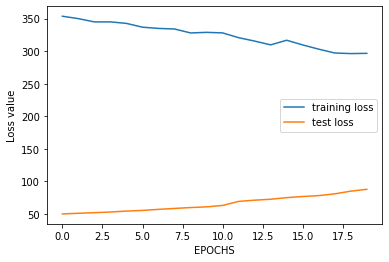

In [46]:
fig,ax = plt.subplots()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='test loss')
ax.set_xlabel('EPOCHS')
ax.set_ylabel('Loss value')
plt.legend();

In [42]:
y_pred = model.predict(X_test)
y_pred

array([[-1.4925115],
       [-1.4925121],
       [-1.4925119],
       [-1.4925123],
       [-1.4925102],
       [-1.4925119],
       [-1.3815812]], dtype=float32)

In [43]:
# Inverse transformed data
# To get original unscaled values

y_train_inv = Total_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = Total_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = Total_transformer.inverse_transform(y_pred.reshape(1, -1))

y_train_inv = y_train_inv.flatten()
y_test_inv = y_test_inv.flatten()
y_pred_inv = y_pred_inv.flatten()

print(y_train_inv)
print(y_test_inv)
print(y_pred_inv)

[ 2.67909384e+02 -8.67855422e+02 -5.00402103e+02 -1.99758478e+02
 -1.36892813e+03 -6.34021491e+02 -9.95439359e+01 -5.33806950e+02
  2.34504536e+02  2.34504536e+02  6.70605823e-01 -7.34236033e+02
 -1.30211844e+03 -9.34665116e+02 -1.32948783e+02 -6.34021491e+02
 -3.27342414e+01  1.34289995e+02 -6.00616644e+02 -7.67640880e+02
 -6.34021491e+02  5.01743314e+02  3.40754530e+01  3.68123925e+02
  1.00885147e+02]
[  301.31423084 -2170.64446377 -2103.83476932 -1302.11843593
  -801.04572757 -1669.5717554     67.48030027]
[-15.781668 -15.781687 -15.781679 -15.781694 -15.781622 -15.781679
 -12.076056]


In [ ]:
#Plot history, actual and predicted value

plt.plot(np.arange(0, len(y_train)), y_train_inv, color='green', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv, color='blue', marker='.', label="Actual")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv, color='red', label="Prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

KeyboardInterrupt: 

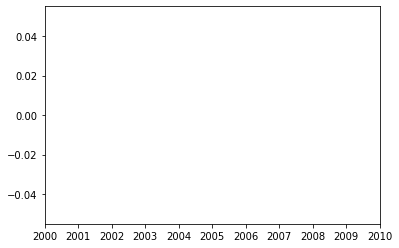

In [38]:
# before modelling 

ax = sns.lineplot(x = "timestamp", y = "In", data = dataset)
ax.set(xlabel = 'timestamp', ylabel = 'Count')

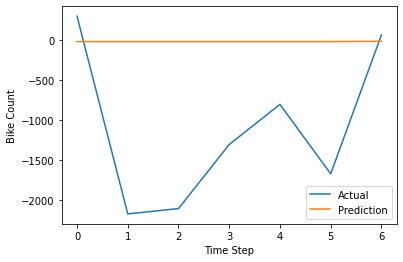

In [50]:
# Plot actual and predicted value

plt.plot(y_test_inv[:25,], label="Actual")
plt.plot(y_pred_inv[:25,], label="Prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [49]:
print(y_pred_inv)

[-15.781668 -15.781687 -15.781679 -15.781694 -15.781622 -15.781679
 -12.076056]
